In [1]:
#import all the necessary packages
import numpy as np
import pandas as pd
import sklearn

In [2]:
#import the text file with data from the local machine
#this is a text file without any headers and hence the headers 
#are assigned in the following line
df = pd.read_csv('E:/Book_Revision/cust1.txt', delim_whitespace=True, 
                 names=["Sales_Effort","Product_Sales"], header=None)
print(df)

    Sales_Effort  Product_Sales
0            100             10
1             82              8
2             71              7
3            111             11
4            112             11
5             61              6
6             62              6
7            113             11
8            101             10
9             99             10
10            79              8
11            81              8
12            51              5
13            50              5
14            49              5
15            30              3
16            31              3
17            29              3
18            20              2
19            41              4
20            39              4


In [3]:
#separating the response variable data to a separate dataframe
y = df["Product_Sales"]
#displaying top 5 values from this dataframe
y.head(5)

0    10
1     8
2     7
3    11
4    11
Name: Product_Sales, dtype: int64

In [4]:
#other than the Product_Sales other data is carried over to a separate dataframe
X = df.drop(['Product_Sales'], axis=1)
#print out the data types
print(X.dtypes)
#displaying top 5 values from this dataframe
X.head(5)

Sales_Effort    int64
dtype: object


,Sales_Effort
0,100
1,82
2,71
3,111
4,112


In [5]:
#The data is split as training set and test set
#There are multiple means - Here we are doing it manually
train_samples = (15)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                train_size=train_samples, test_size=6)

In [6]:
#importing necessary packages
from sklearn.linear_model import LinearRegression
#running the LinearRegression
Line_Reg = LinearRegression()
Line_Reg.fit(X_train, y_train)
#Line_Reg is the model generated

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#print regression coefficients
print(Line_Reg.coef_)

[ 0.09808242]


In [8]:
#print the regression score using the test data
#this provides the regression model accuracy
Line_Reg.score(X_test, y_test)

0.99826609407969369

In [9]:
#the above result shows an accuracy of 99.91%
#finding the mean square error on the test predictions
np.mean((Line_Reg.predict(X_test)-y_test)**2)

0.013534098989057235

In [10]:
#the above shows very less overall error in the prediction
#run the model on the test data to arrive at the predicted values
predicted = Line_Reg.predict(X_test)
#printing the predicted and actual response values
print(predicted)
print(y_test)

[  6.17895825  10.00417248   5.10005167  10.98499664   3.13840335
   8.14060657]
6      6
8     10
12     5
3     11
16     3
1      8
Name: Product_Sales, dtype: int64


In [11]:
#as you can see above there is high agreement between the
#predicted and actual values

In [12]:
#We will use the entire data set to carry out the
#prediction using the regression model generated
predicted_full = Line_Reg.predict(X)
#printing the predicted and actual response values
print(predicted_full)
print(y)

[  9.90609006   8.14060657   7.06169999  10.98499664  11.08307905
   6.08087583   6.17895825  11.18116147  10.00417248   9.80800764
   7.84635932   8.04252415   5.10005167   5.00196925   4.90388684
   3.04032093   3.13840335   2.94223851   2.05949677   4.11922751
   3.92306267]
0     10
1      8
2      7
3     11
4     11
5      6
6      6
7     11
8     10
9     10
10     8
11     8
12     5
13     5
14     5
15     3
16     3
17     3
18     2
19     4
20     4
Name: Product_Sales, dtype: int64


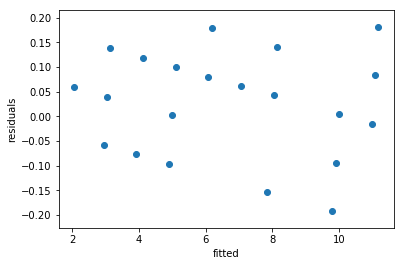

In [13]:
#creating the scatter plot between response variable
#actual values and predicted values
import matplotlib.pyplot as plt
plt.scatter(predicted_full, (predicted_full-y))
plt.xlabel("fitted")
plt.ylabel("residuals")
plt.show()

In [14]:
#Validation of the regression assumption: Linearity
#As you can see in the above graph the residuals are very small
#residuals are randomly spread around the 0.00 residuals
#hence, this depicts that the linearity assumption is validated

#Validation of the regression assumption: Test of equal variance (homoscedasticity)
#Further, As we can see from the plot (above in case of test of linearity), 
#there is there no significant difference in the variation of the residuals 
#for different levels of the independent variable’s values. 
#Hence, we consider that the test of equal variance of the distribution
#of the response variable as passed

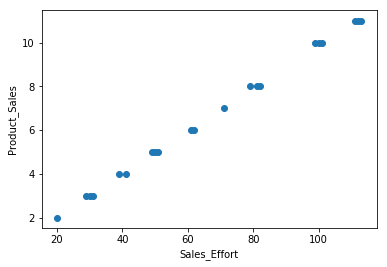

In [15]:
#creating the scatter plot between response variable
#actual values and independent variable actual values
plt.scatter(df.Sales_Effort, df.Product_Sales)
plt.xlabel("Sales_Effort")
plt.ylabel("Product_Sales")
plt.draw()
plt.show()

In [16]:
#Alternative method for validation of the assumption of linearity
#The above graph also shows the linear relationship between two variables clearly

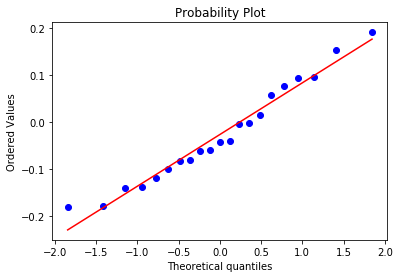

In [17]:
#plotting for the validaton of normal distribution of the residuals
import scipy
from scipy import stats
stats.probplot(y-predicted_full, plot=plt)
plt.show()

In [18]:
#The above plot shows the normal distribution of the
#residuals as residuals are almost on the 45 degree straight
#line

In [19]:
#generate linear regression model using statsmodels package
#this will also enable us to test for the regression 
#assumption related to autocorrelation
from statsmodels.formula.api import ols
#fit linear regression model
Line_Reg_1 = ols('Product_Sales ~ Sales_Effort', data=df).fit()
#print model summary
print(Line_Reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:          Product_Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.530e+04
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           4.42e-29
Time:                        14:30:20   Log-Likelihood:                 17.877
No. Observations:                  21   AIC:                            -31.75
Df Residuals:                      19   BIC:                            -29.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0501      0.059      0.856   

In [20]:
#Model Validation:
#Also as the P > |T| is 0.000 for the predictor it confirms the significance
#of the predictor to the model.  Similarly as Prob (F-statistic) is also
#very very small (negligible) the model explains the relationship between
#the response variable and the predictor variable well

In [21]:
#Validation of regression assumption: No autocorrelation i.e., test of independence
#of Errors around the regression line
#As Durbin-Watson Test above gives a result of ~1.51 which is between 1.5 and 2.5
#the fact that there no autocorrelation is proved.  Anyhow, we also know from
#our data collection effort that each data point is related to differnet person's
#effort

In [28]:
#Now let us create a dataframe with predictors to check that
#the model predicts the values of response variables accurately 
#(even though we have tested the model against the test data
data = {'Sales_Effort': [111, 79]}
df_new_predictors = pd.DataFrame(data=data)
predicted_resp_variable = Line_Reg_1.predict(df_new_predictors)
print(predicted_resp_variable)

0    10.973073
1     7.824101
dtype: float64


In [29]:
#As you can see the predicted values of response variables
#are almost near in value to the actual values